** This is a demo of a gradient descent algorithm. The goal is to fit a regression line based on a set of artificially generated data points. ** 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

** Generate data points for testing **

In [13]:
# Generate baseline
m0 = 0.80
b0 = 1.50
x0 = np.arange(1,9,0.05)
y0 = m0*x0 + b0
# Add random perturbaton to generate data points
np.random.seed(seed=1)
x = x0 + np.random.rand(x0.size)*2 - 1.0
y = y0 + np.random.rand(x0.size)*2 - 1.0

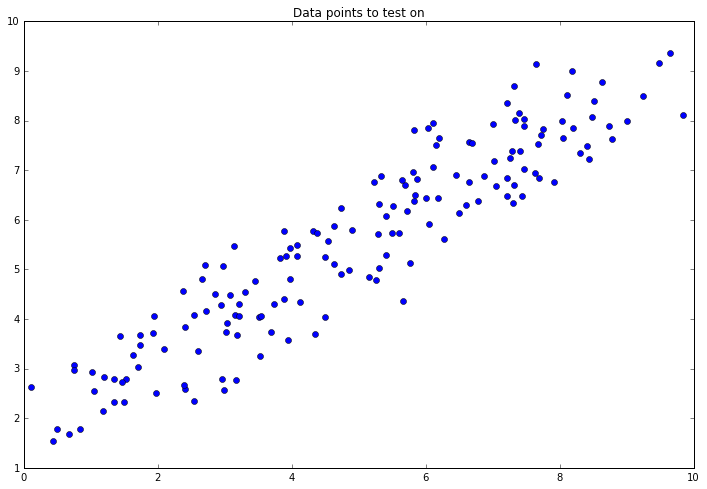

In [71]:
plt.figure(figsize=(12,8))
plt.plot(x,y,'o')
plt.title('Data points to test on')
plt.show()

** Funtion to calculate errors **

In [23]:
def compute_error(m,b,x,y):
    totalerror = 0
    for i in range(0, len(x)):
        totalerror += (y[i] - (m * x[i] + b)) ** 2
    return totalerror / float(len(x))

** Gradient descent for each step **

In [24]:
def step_gradient(m_current,b_current,learning_rate,x,y):
    b_gradient = 0
    m_gradient = 0
    N = float(len(x))
    for i in range(0, len(x)):
        b_gradient += -(2/N) * (y[i] - ((m_current * x[i]) + b_current))
        m_gradient += -(2/N) * x[i] * (y[i] - ((m_current * x[i]) + b_current))
    b_new = b_current - (learning_rate * b_gradient)
    m_new = m_current - (learning_rate * m_gradient)
    return m_new, b_new

** Intialize parameters **

In [49]:
learning_rate = 0.001
n_iter = 51
p_step = 10
cost_func = []

** Gradient descent and visualization **

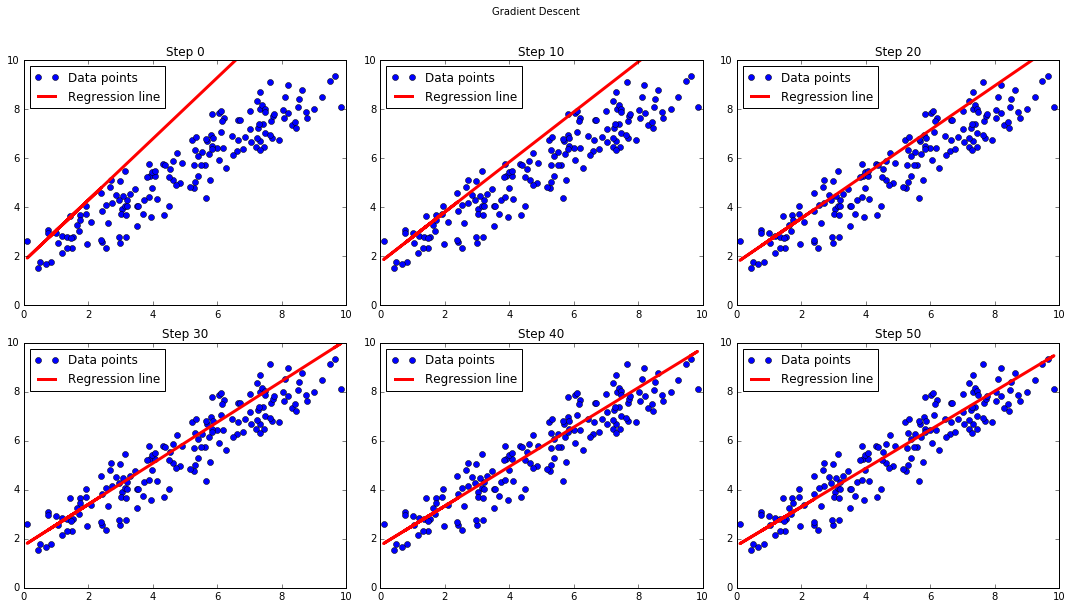

In [72]:
m = 1.25
b = 1.80
fig = plt.figure( )
fig.set_size_inches(15, 8)   
for i in range(0, n_iter):
    y_current = x*m + b
    if i%p_step == 0:
        plt.subplot(2,3,int(i/p_step)+1)
        plt.plot(x,y,'o',label='Data points')
        plt.plot(x,y_current,'r-',linewidth=3,label='Regression line')
        plt.title('Step {}'.format(i))
        plt.xlim([0,10])
        plt.ylim([0,10])
        plt.legend(loc=2)
    m,b = step_gradient(m,b,learning_rate,x,y)
    cost_func.append(compute_error(m,b,x,y))
fig.suptitle('Gradient Descent',y = 1.05)
plt.tight_layout()